# MARKETING Y COMUNICACIÓN

## ANÁLISIS DE NEGOCIO

### SPRINT N°1
* Fecha de inicio: 25/11/2024
* Fecha de presentación: 2/12/2024

**OBJETIVOS**
1) ¿Cómo afecta la duración de las llamadas de contacto a la probabilidad de que un cliente suscriba a un depósito a plazo?
2) ¿Qué ajustes podríamos hacer en nuestros métodos de contacto para mejorar la tasa de respuesta?

#### LIBRERIAS

In [ ]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### DATAFRAME: df_BANK_marketing

In [10]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing.parquet')
df_BANK_marketing.sample(10)

id   age          job   marital  education  is_in_default  balance  \
1927    1928  33.0   technician   married  secondary              0      221   
6816    6817  54.0      retired   married    primary              0        0   
11006  11007  31.0  blue-collar   married  secondary              0     1664   
6568    6569  35.0   management    single   tertiary              0     -292   
2576    2577  60.0       admin.   married  secondary              0      106   
3446    3447  41.0   management  divorced   tertiary              0     5037   
4223    4224  50.0   technician  divorced  secondary              0        0   
429      430  25.0  blue-collar    single    primary              0     2483   
3940    3941  36.0   management   married   tertiary              0     2161   
10269  10270  35.0       admin.   married  secondary              0      725   

       housing  loan   contact  day month  duration  campaign  pdays  \
1927         1     0  cellular   13   may       669         1    355   
6816         1     0  cellular   11   jul       159         2     -1   
11006        1     0  cellular    7   may       603         2     17   
6568         1     0  cellular   18   may       166         2    272   
2576         0     0  cellular   21   aug       216         3     91   
3446         0     0  cellular   23   apr       252         9    185   
4223         0     0  cellular   29   sep       159         1    120   
429          0     0  cellular   10   jul      1499         3     -1   
3940         0     0  cellular    8   sep       708         2    183   
10269        1     0  cellular   20   nov       219         7    133   

       previous poutcome  deposit  
1927          4  failure        1  
6816          0  unknown        0  
11006         2  failure        0  
6568          6  failure        0  
2576          1  success        1  
3446          5    other        1  
4223          2  failure        1  
429           0  unknown        1  
3940          5  success        1  
10269         1  failure        0

#### DISPERSIÓN DE LA DURACIÓN DE LAS LLAMADAS

Para comenzar con el análisis de como afecta la duración de las llamadas (en segundos) a la probabilidad de que un cliente suscriba a un depósito a plazo, observaremos la dispersión total de las llamadas y como se posicionan respecto a los cuartiles. 

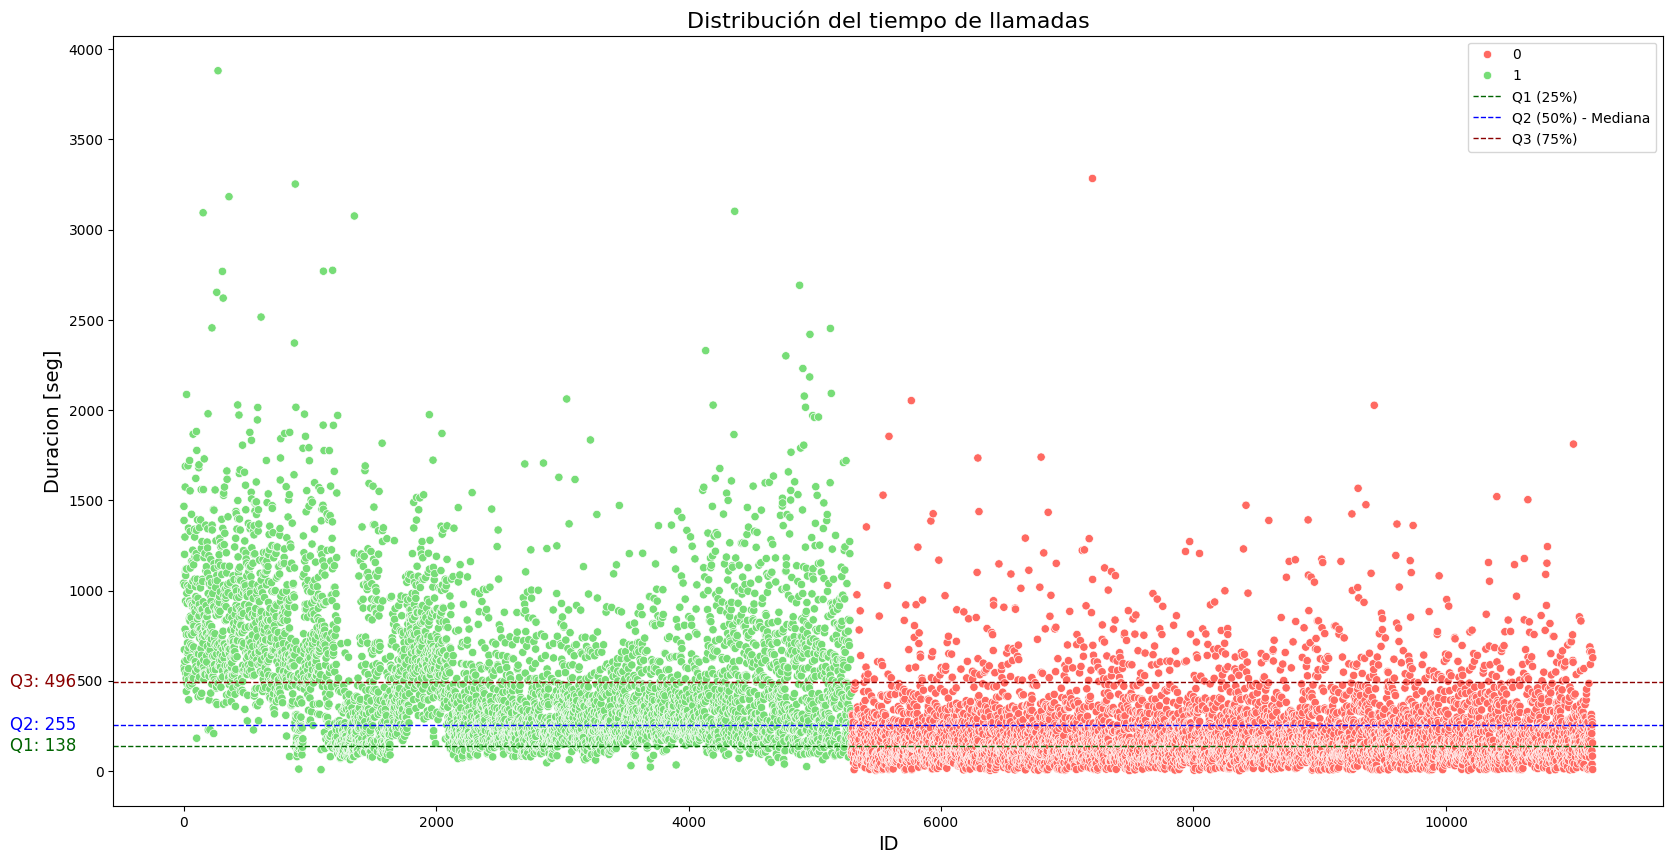

In [ ]:
#Cálculo de los cuartiles de 'duration'
Q1 = df_BANK_marketing['duration'].quantile(0.25)
Q2 = df_BANK_marketing['duration'].quantile(0.50)  #Mediana
Q3 = df_BANK_marketing['duration'].quantile(0.75)

#Ajuste de tamaño del gráfico
plt.figure(figsize=(20, 10))

#Scatter con 'duration', 'id' y filtrado por la contratación o no del depósito (1 = si, 0 = no)
sns.scatterplot(
    x='id', 
    y='duration', 
    hue='deposit', 
    data=df_BANK_marketing, 
    palette={1: '#77dd77', 0: '#ff6961'}  #'1' = Verde | '0' = Rojo
)

#Representación de cuartiles en eje X
plt.axhline(Q1, color='#006400', linestyle='--', linewidth=1, label='Q1 (25%)')  #Verde oscuro = #006400
plt.axhline(Q2, color='blue', linestyle='--', linewidth=1, label='Q2 (50%) - Mediana')
plt.axhline(Q3, color='#8B0000', linestyle='--', linewidth=1, label='Q3 (75%)')  #Rojo oscuro = #8B0000

#Ajuste de los valores de los cuartiles por fuera del gráfico
x_offset = df_BANK_marketing['id'].min() - 850  # '850' es el offset
plt.text(x_offset, Q1, f'Q1: {Q1:.0f}', color='#006400', fontsize=12, va='center', ha='right')  #Verde oscuro = #006400
plt.text(x_offset, Q2, f'Q2: {Q2:.0f}', color='blue', fontsize=12, va='center', ha='right')
plt.text(x_offset, Q3, f'Q3: {Q3:.0f}', color='#8B0000', fontsize=12, va='center', ha='right')  #Rojo oscuro = #8B0000


#Título, ejes y leyenda
plt.title('Distribución del tiempo de llamadas', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Duracion [seg]', fontsize=14)
plt.legend()

plt.show()


Dada la cantidad de registros, no se puede apreciar bien la cantidad de registros en cada cuartil, por lo que procedemos a graficar un boxplot e intentar aclarar aún más estos valores.

In [39]:
df_BANK_marketing.groupby('deposit')['duration'].describe().round()

count   mean    std  min    25%    50%    75%     max
deposit                                                        
0        5873.0  223.0  209.0  2.0   94.0  163.0  282.0  3284.0
1        5290.0  537.0  393.0  8.0  244.0  426.0  725.0  3881.0

<Figure size 2000x1000 with 0 Axes>

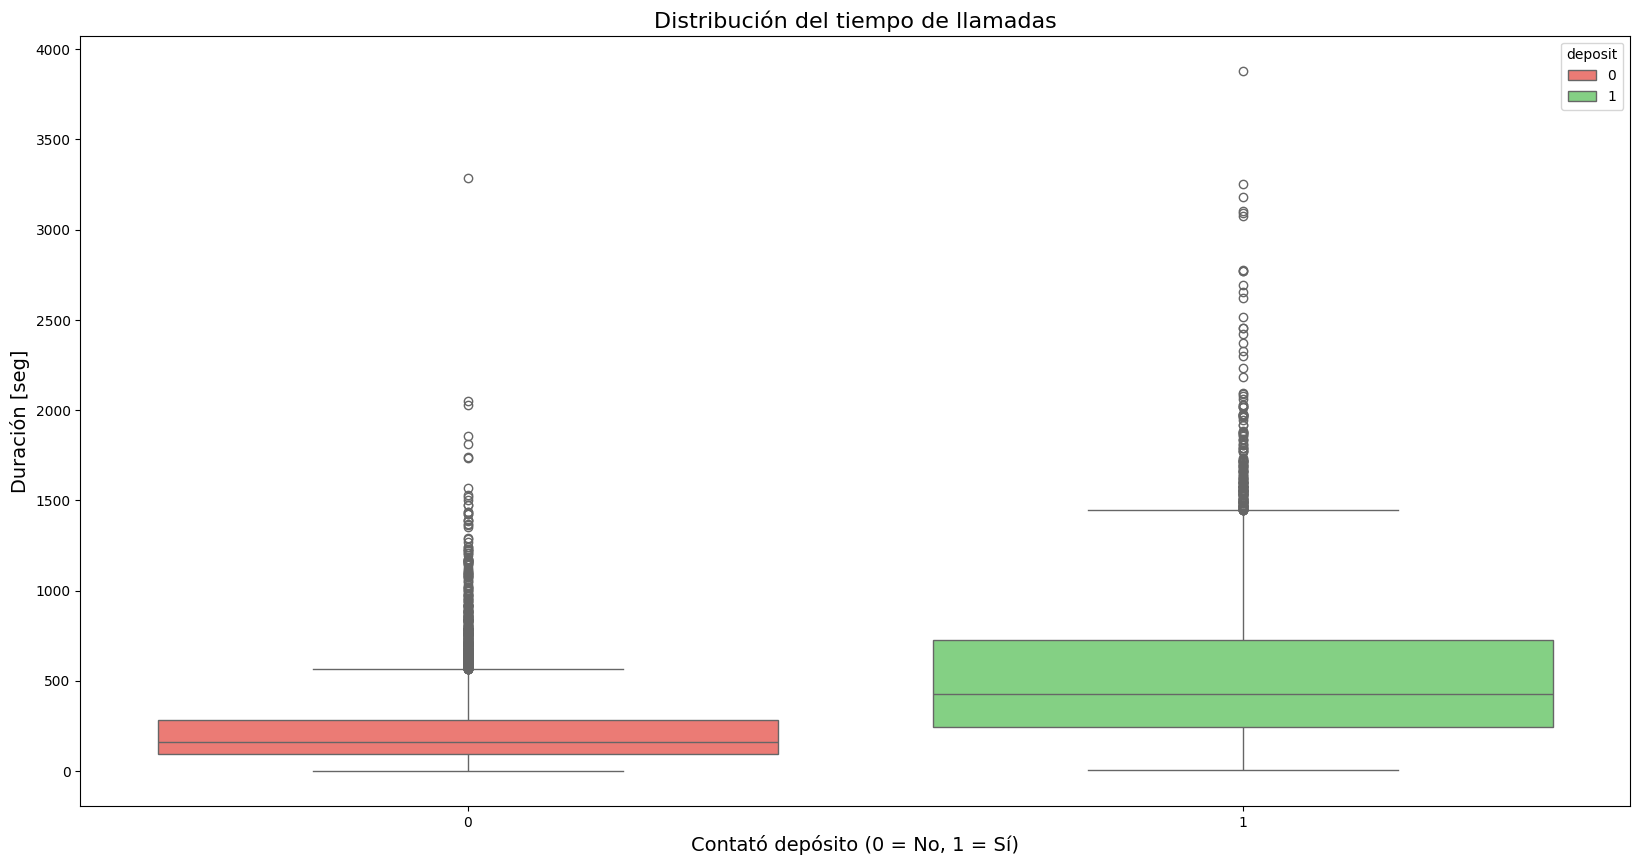

In [ ]:
plt.figure(figsize=(20, 10))

plt.figure(figsize=(20, 10))
sns.boxplot(
    x='deposit', 
    y='duration', 
    data=df_BANK_marketing, 
    hue='deposit',  #Solamente para que se le asigne un color
    palette={1: '#77dd77', 0: '#ff6961'},  #'1' = Verde | '0' = Rojo
)

#Título, ejes y leyenda
plt.title('Distribución del tiempo de llamadas', fontsize=16)
plt.xlabel('Contató depósito (0 = No, 1 = Sí)', fontsize=14)
plt.ylabel('Duración [seg]', fontsize=14)
plt.show()

In [41]:
df_BANK_marketing.groupby('deposit')['duration'].describe().round()


count   mean    std  min    25%    50%    75%     max
deposit                                                        
0        5873.0  223.0  209.0  2.0   94.0  163.0  282.0  3284.0
1        5290.0  537.0  393.0  8.0  244.0  426.0  725.0  3881.0

En el boxplot, se observa como incrementa la mediana con respecto a lo clientes que contrataron el depósito (426 segundos) versus los que no (163 segundos).
También los cuartiles parecen tener más sentido con respecto a una llamada telefónico, la mayor cantidad de valores se encuentra entre los quartiles de 244 a 725 segundos, 

#### TASA DE ÉXITO SEGÚN EL TIPO DE CONTACTO

In [57]:
#'deposit' == 1 (Contrató depósito) - success
success_contacts = df_BANK_marketing[df_BANK_marketing['deposit'] == 1]

#'deposit' == 0 (No contrató depósito) - unsuccess
unsuccess_contacts = df_BANK_marketing[df_BANK_marketing['deposit'] == 0]

#Count total de contactos
total_count = df_BANK_marketing.groupby('contact')['deposit'].count()

#Count de success 
success_count = success_contacts.groupby('contact')['deposit'].count()

#Count de unsuccess 
unsuccess_count = unsuccess_contacts.groupby('contact')['deposit'].count()

#df con el total de contactos, success y unsuccess
contact_analysis = pd.DataFrame({
    'Total contactados': total_count,
    'Contactos exitosos': success_count,
    'Contactos no exitosos': unsuccess_count
})

#Tasa de éxito: success / total de contactos
contact_analysis['Tasa de éxito (%)'] = round((contact_analysis['Contactos exitosos'] / contact_analysis['Total contactados']) * 100,2)

#Tasa de no éxito: unsuccess / total de contactos
contact_analysis['Tasa de no éxito (%)'] = round((contact_analysis['Contactos no exitosos'] / contact_analysis['Total contactados']) * 100,2)

contact_analysis

Total contactados  Contactos exitosos  Contactos no exitosos  \
contact                                                                   
cellular                8042                4369                   3673   
telephone                774                 390                    384   
unknown                 2347                 531                   1816   

           Tasa de éxito (%)  Tasa de no éxito (%)  
contact                                             
cellular               54.33                 45.67  
telephone              50.39                 49.61  
unknown                22.62                 77.38

In [ ]:
ax = contact_analysis[['Contactos exitosos', 'Contactos no exitosos']].plot(
    kind='bar', 
    stacked=False, 
    figsize=(20, 10),
    color=['#77dd77', '#ff6961']  #Colores verde (Contactos Exitosos) y rojo (Contactos No exitosos)
)

plt.title('Contactos exitosos y no exitosos según método de Contacto', fontsize=16)
plt.xlabel('Método de Contacto', fontsize=14)
plt.ylabel('Número de contactos', fontsize=14)
plt.xticks(rotation=0)
plt.legend(fontsize=12)

#Valores sobre barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  #Centrado en la barra
            height,  #Encima de la barra
            f'{int(height)}',  #Valor a mostrar
            ha='center', 
            va='bottom', 
            fontsize=10
        )

plt.show()

* La mayoría de los clientes contactados fue a través de su movil, siendo un 54.33% la tasa de éxito. 
* Hay una gran diferencia de llamados hacia teléfonos fijos, los cuales un 50.39% aceptó la contratación del depósito.
* En un nivel intermedio tenemos los contactos que no se identificó el medio, con una tasa muy baja de éxito del 22.62%


#### DURACIÓN DE LAS LLAMADAS SEGÚN EL TIPO DE CONTACTO Y LA CONTRATACIÓN

##### 'CELLULAR'

In [ ]:
#Éxitos 'cellular' y 'telephone'
success_contacts_celullar = success_contacts[success_contacts['contact'] == 'cellular']
success_contacts_telephone = success_contacts[success_contacts['contact'] == 'telephone']

#No éxitos 'cellular' y 'telephone'
unsuccess_contacts_celullar = unsuccess_contacts[unsuccess_contacts['contact'] == 'cellular']
unsuccess_contacts_telephone = unsuccess_contacts[unsuccess_contacts['contact'] == 'telephone']

# IN WORKING

Estoy trabajando en la idea de crear una nueva columna que sea 'duration (min)' = 'duration' / 60 y agrupar las llamadas por minutos en un df que informe porcentaje de éxito y porcentaje de no éxito primero a nivel general y luego segmentado por 'cellular' o 'telephone'. 
* ¿Si hago una campana de Gaus, dónde se posicionan la mayor cantidad de llamadas (en minutos) éxitosas? 
* ¿Hay alguna diferencia en cuanto a las no éxitosas? Tiene que haber un tiempo en minutos que destaque más en cantidad y en porcentaje de éxito.

Con eso respondería a:
1) ¿Cómo afecta la duración de las llamadas de contacto a la probabilidad de que un cliente suscriba a un depósito a plazo?